In [30]:
import PyCC
import numpy as np
import matplotlib.pyplot as plt

def e_phis(outs):
    steps = np.unique(outs.loc[:,"step"].to_numpy())
    phis = np.zeros((len(steps)),dtype=float)
    for step in steps:
        phis[step] = np.sum(out[out["step"] == step].loc[:,"phi"].to_numpy())/2
    return phis

def e_kin(outs,df):
    steps = np.unique(outs.loc[:,"step"].to_numpy())
    energies = np.zeros((len(steps)),dtype=float)
    for step in steps:
        energies[step] = np.sum(0.5 * df.loc[:,"mass"].to_numpy() * np.linalg.norm(out[out["step"] == step].loc[:,["vx","vy","vz"]].to_numpy(),axis=1)**2)
    return energies

def plot_pretty(dpi=150,fontsize=15):
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in')
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5)
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5)
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    plt.rc('legend',fontsize=5)
    plt.rcParams['figure.figsize'] = [5, 3]

In [31]:
plot_pretty()

In [32]:
M = 1
G = 1
a = 1
n = 10000

df = PyCC.Distributions.Plummer(n=n,M=M,G=G,a=a)

out,stats = PyCC.evaluate(df,steps=8,G=G,precision="double",dt=1/64)

phis = e_phis(out)
kins = e_kin(out,df)

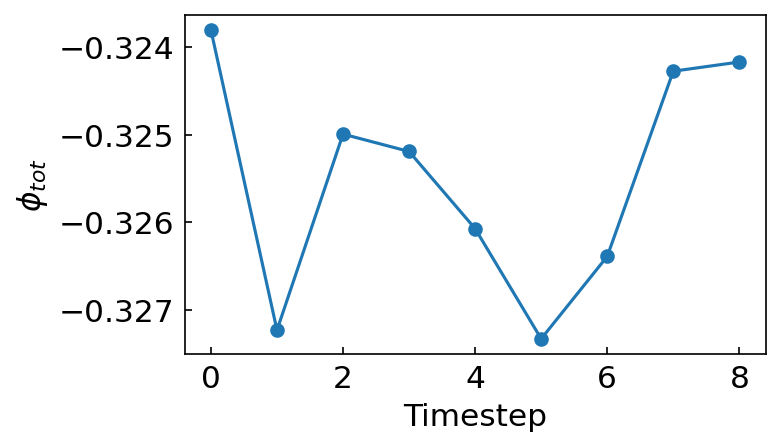

In [33]:
plt.plot(phis)
plt.scatter(np.arange(len(kins)),phis)
plt.xlabel("Timestep")
plt.ylabel(r"$\phi_{tot}$")
plt.show()

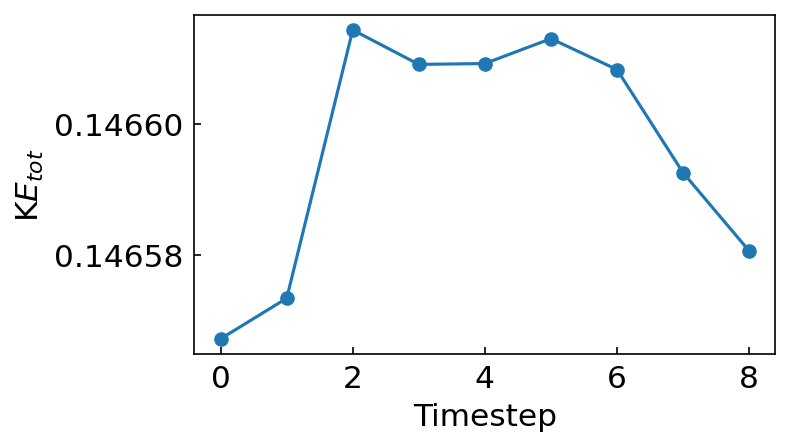

In [34]:
plt.plot(kins)
plt.scatter(np.arange(len(kins)),kins)
plt.xlabel("Timestep")
plt.ylabel(r"K$E_{tot}$")
plt.show()

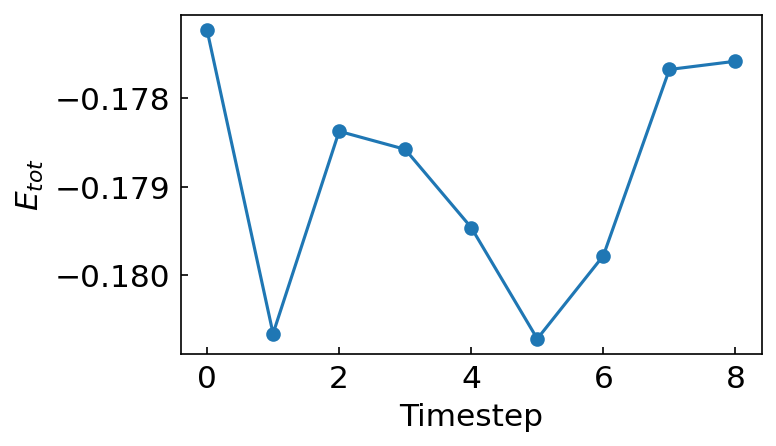

In [35]:
plt.plot(kins+phis)
plt.scatter(np.arange(len(kins)),kins+phis)
plt.xlabel("Timestep")
plt.ylabel(r"$E_{tot}$")
plt.show()

In [36]:
M = 1
G = 1
a = 1
n = 1000

df = PyCC.Distributions.Plummer(n=n,M=M,G=G,a=a)

out,stats = PyCC.evaluate(df,steps=8,G=G,precision="double",dt=1/64)

phis = e_phis(out)
kins = e_kin(out,df)

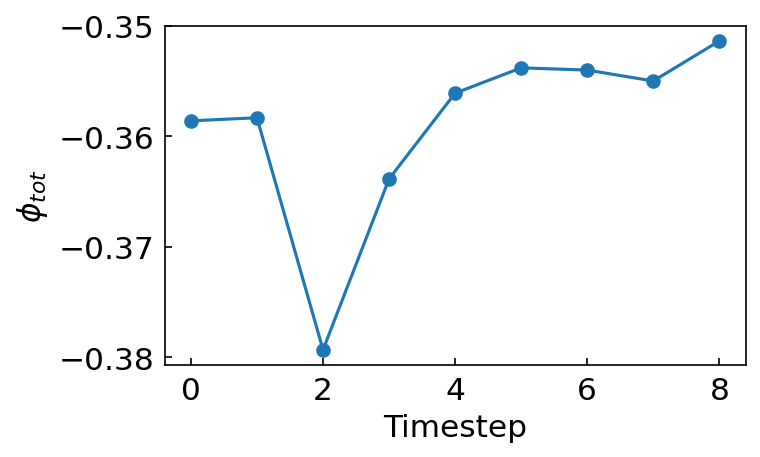

In [37]:
plt.plot(phis)
plt.scatter(np.arange(len(kins)),phis)
plt.xlabel("Timestep")
plt.ylabel(r"$\phi_{tot}$")
plt.show()

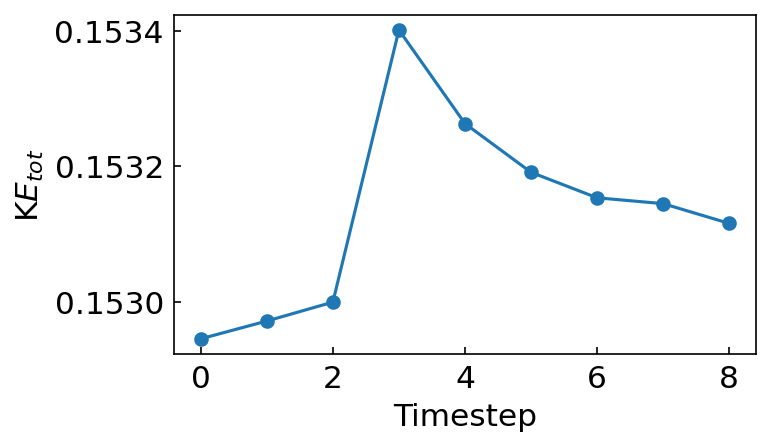

In [38]:
plt.plot(kins)
plt.scatter(np.arange(len(kins)),kins)
plt.xlabel("Timestep")
plt.ylabel(r"K$E_{tot}$")
plt.show()

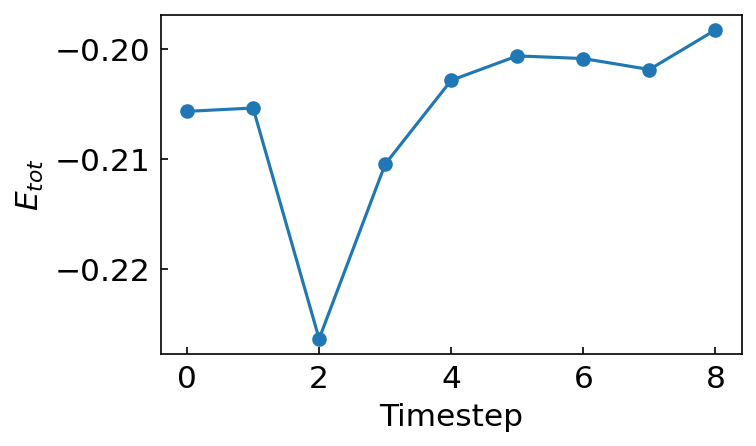

In [39]:
plt.plot(kins+phis)
plt.scatter(np.arange(len(kins)),kins+phis)
plt.xlabel("Timestep")
plt.ylabel(r"$E_{tot}$")
plt.show()